<a href="https://colab.research.google.com/github/Function514/Examen-Python2/blob/main/Examen_Final_Fernando_Soto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema 1: Establezca 2 modelos de clasificación para el data Iris

In [19]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split as tts
from sklearn import datasets 
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import plotly.express as px

# Modelo 1: KNN

dataset = px.data.iris()
dataset.head()
len_array = np.array(dataset['sepal_length'])
wid_array = np.array(dataset['sepal_width'])
X = np.c_[len_array,wid_array]
y = np.array(dataset['species_id'])

Xtrain,Xtest,ytrain,ytest = tts(X,y)

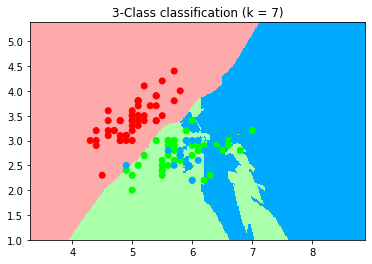

In [20]:
n_neighborss = 7
h=.02
modeloKNN = knn(n_neighbors= n_neighborss)
modeloKNN.fit(Xtrain,ytrain)

#Colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

#Limites
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))


Z = modeloKNN.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighborss))
plt.show()

Problema 2: Evaluar 2 modelos, uno con PCA y uno sin PCA para el modelo de clasificación del dataset melbournhouses

Problema 3: ¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 

In [24]:
import pandas as pd
import numpy as np

ruta='/content/drive/MyDrive/Colab Notebooks/wine.xlsx'
paises_df=pd.read_excel(ruta)

from sklearn.preprocessing import LabelEncoder
Xlabel = np.array(paises_df['country'])
Encoder = LabelEncoder()
Encoder.fit(Xlabel)
Xcod = Encoder.fit_transform(Xlabel)

X_singen =paises_df.drop(columns = ['price','country','designation','description','province','region_1','region_2','variety','winery'])
X_singen['country']=Xcod

y=np.array(paises_df['price'])
y=np.reshape(y,(150930,1))
print(X_singen)

        Unnamed: 0  points  country
0                0      96       44
1                1      96       40
2                2      96       44
3                3      96       44
4                4      95       15
...            ...     ...      ...
150925      150925      91       22
150926      150926      91       15
150927      150927      91       22
150928      150928      90       15
150929      150929      90       22

[150930 rows x 3 columns]


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xgenerado = np.array(X_singen)
X_scal =scaler.fit_transform(Xgenerado)
print(X_scal)

[[0.00000000e+00 8.00000000e-01 9.16666667e-01]
 [6.62563192e-06 8.00000000e-01 8.33333333e-01]
 [1.32512638e-05 8.00000000e-01 9.16666667e-01]
 ...
 [9.99986749e-01 5.50000000e-01 4.58333333e-01]
 [9.99993374e-01 5.00000000e-01 3.12500000e-01]
 [1.00000000e+00 5.00000000e-01 4.58333333e-01]]


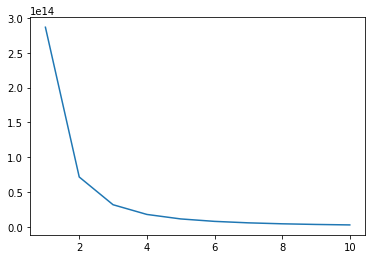

In [26]:
from sklearn.cluster import KMeans
inercia =[]
for i in range(1,11):
  k_means = KMeans(n_clusters = i)
  k_means.fit(X_singen)
  inercia.append(k_means.inertia_)
#Visualizar el codo de Jambu

plt.plot(range(1,11),inercia)

In [27]:
k_means2 = KMeans(n_clusters = 2) #Hay un codo en k=2
k_means2.fit(X_singen)
labels = k_means2.labels_

In [28]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split as tts
Xtrain,Xtest, ytrain, ytest=tts(X_singen,labels,test_size=0.4,random_state=42)
modeloRFR =RFR(n_estimators=200,random_state=42)
modeloRFR.fit(Xtrain,ytrain)
# Se verifican los resultados
from sklearn.metrics import r2_score, mean_squared_error

ytestpred =modeloRFR.predict(Xtest)
r2RFval = r2_score(ytest, ytestpred)
print(r2RFval, "es el coeficiente de determinación del modelo, en validación")

ytrainpred =modeloRFR.predict(Xtrain)
r2RFentr = r2_score(ytrain, ytrainpred)
print(r2RFentr, "es el coeficiente de determinación del modelo, en entrenamiento")

0.9999566702897693 es el coeficiente de determinación del modelo, en validación
0.9999998774263202 es el coeficiente de determinación del modelo, en entrenamiento


No hay sobreajuste con n = 200

Problema 4: Graficar un modelo de deep learning para el dataset "breast cancer"

In [29]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
breastdf = pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/clase6/breast-cancer.csv')


dfX = breastdf.drop(columns = ['id','diagnosis'])

In [6]:
from sklearn.preprocessing import LabelEncoder
y = np.array(breastdf['diagnosis'])
Encoder = LabelEncoder()
y = Encoder.fit_transform(y)
y = np.reshape(y,(len(y),1))
print(y[:4])
print(np.shape(y))

[[1]
 [1]
 [1]
 [1]]
(569, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler
escalar = MinMaxScaler()
X = np.array(dfX)
X = escalar.fit_transform(X)
print(X[0:4,:])

[[0.52103744 0.0226581  0.54598853 0.36373277 0.59375282 0.7920373
  0.70313964 0.73111332 0.68636364 0.60551811 0.35614702 0.12046941
  0.3690336  0.27381126 0.15929565 0.35139844 0.13568182 0.30062512
  0.31164518 0.18304244 0.62077552 0.14152452 0.66831017 0.45069799
  0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 0.50159067 0.28987993 0.18176799
  0.20360825 0.34875746 0.37979798 0.14132266 0.15643672 0.08258929
  0.12444047 0.12565979 0.11938675 0.08132304 0.0469697  0.25383595
  0.08453875 0.0911101  0.60690146 0.30357143 0.53981772 0.43521431
  0.34755332 0.15456336 0.19297125 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 0.44941676 0.51430893 0.4310165
  0.46251172 0.63568588 0.50959596 0.21124684 0.22962158 0.09430251
  0.18037035 0.16292179 0.15083115 0.2839547  0.09676768 0.38984656
  0.20569032 0.12700551 0.55638563 0.36007463 0.50844166 0.37450845
  0.48358978 0.38537513 0.35974441 0.83505155 0.

In [8]:
Xtrain,Xtest,ytrain,ytest = tts(X,y)

In [11]:
ModeloClasificador = tf.keras.Sequential([
      tf.keras.Input(shape = (30,)),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(60,activation = 'relu'),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(10,activation = 'relu'),
      tf.keras.layers.Dense(4,activation = 'relu'),
      tf.keras.layers.Dense(2,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
])

ModeloClasificador.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')

ModeloClasificador.fit(Xtrain,ytrain,epochs = 500)


Epoch 1/500
14/14 [==============================] - 1s 5ms/step - loss: 0.6902 - accuracy: 0.5164
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.8451
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.7653
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6784 - accuracy: 0.7606
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.7066
Epoch 6/500
14/14 [==============================] - 0s 9ms/step - loss: 0.6723 - accuracy: 0.6737
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6692 - accuracy: 0.6714
Epoch 8/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6660 - accuracy: 0.6643
Epoch 9/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6636 - accuracy: 0.6667
Epoch 10/500
14/14 [==============================] - 0s 9ms/step - loss: 0.6609 - accuracy: 0.6526
Epoch 11/

In [13]:
ModeloClasificador2 = tf.keras.Sequential([
      tf.keras.Input(shape = (30,)),
      tf.keras.layers.Dense(100,activation = 'relu'),
      tf.keras.layers.Dense(400,activation = 'relu'),
      tf.keras.layers.Dense(200,activation = 'relu'),
      tf.keras.layers.Dense(100,activation = 'relu'),
      tf.keras.layers.Dense(50,activation = 'relu'),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(10,activation = 'relu'),
      tf.keras.layers.Dense(4,activation = 'relu'),
      tf.keras.layers.Dense(2,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
])

ModeloClasificador2.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')


historico = ModeloClasificador2.fit(Xtrain,ytrain,epochs = 700,verbose = False)

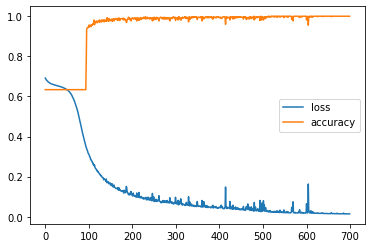

In [14]:
pd.DataFrame(historico.history).plot()


Problema 5: Crea una función que aplane la ruta de una imagen

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

def AplanarImagen (ruta):
  img1 = plt.imread(ruta)
  # Se convierte a vector
  img1_vector = img1.flatten()  
  return img1_vector

ruta = '/content/drive/MyDrive/Colab Notebooks/Gato.jpg'
Foto = AplanarImagen(ruta)

print(Foto.shape)

(691200,)
